In [1]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [2]:
dataset = load_iris()
X = dataset.data
y = dataset.target
target_names = dataset.target_names
dataset_name = "Iris"

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Apply t-SNE
# You can adjust parameters like n_components, perplexity, n_iter
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

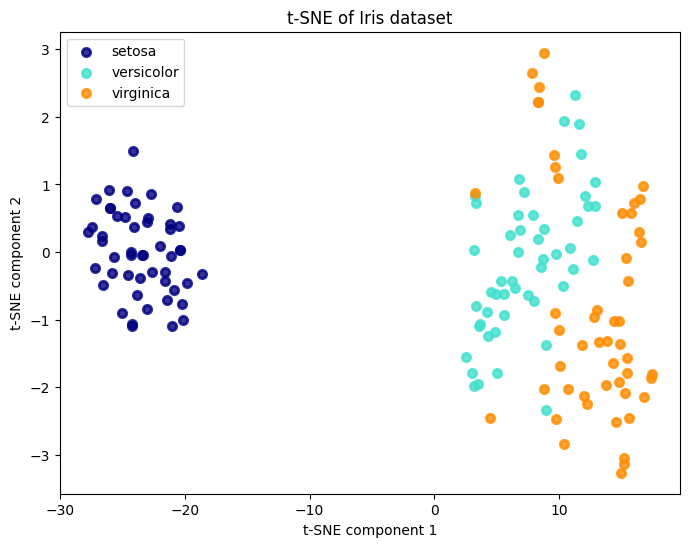

In [5]:
# Create a scatter plot of the t-SNE results
plt.figure(figsize=(8, 6))
if dataset_name == "Iris" and y is not None:
    colors = ['navy', 'turquoise', 'darkorange']
    lw = 2
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
else:
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=.8, lw=2)

plt.title(f't-SNE of {dataset_name} dataset')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

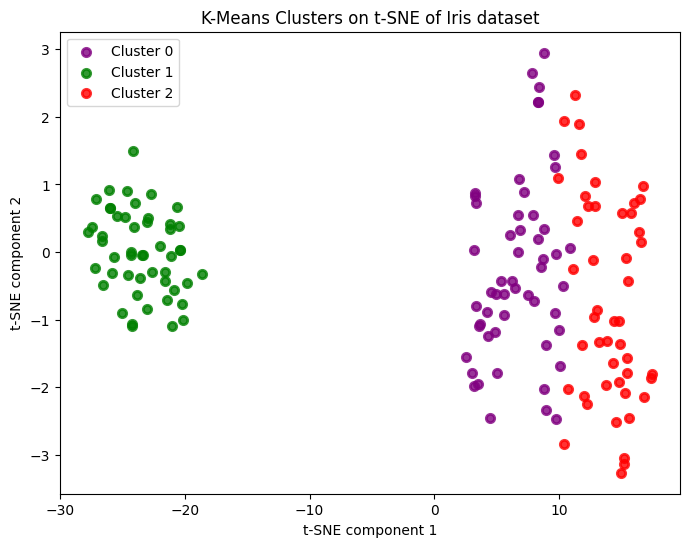

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Knowing there are 3 classes in Iris
clusters = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(8, 6))
colors = ['purple', 'green', 'red'] # Colors for clusters
for color, i in zip(colors, [0, 1, 2]):
    plt.scatter(X_tsne[clusters == i, 0], X_tsne[clusters == i, 1], color=color, alpha=.8, lw=lw,
                label=f'Cluster {i}')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(f'K-Means Clusters on t-SNE of {dataset_name} dataset')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()